# Tecnologias para Desenvolvimento de Big Data 
# Aula 03
# Grupo: Andrei, Daniel e João

## Base de dados

### Homicide Reports, 1980-2014
*Can you develop an algorithm to detect serial killer activity?*

https://www.kaggle.com/murderaccountability/homicide-reports

##### Contexto
Este conjunto de dados com relatório de homicídios do FBI e das solicitação de acesso à informação (FOIA) no período de 1980 a 2014.
A Lei de Acesso à Informação (FOIA - 5 U.S.C. § 552), é uma lei federal de liberdade de informação que permite a divulgação total ou parcial de informações e documentos inéditos anteriormente controlados pelo governo dos Estados Unidos.

##### Conteúdo
Os conjuntos de dados consistem em várias variáveis com informações sobre os crimes. São 24 colunas, desxcritas abaixo.

- Record ID: Chave artificial (a ser removida?). Tipo numérico.
- Agency Code: Código da agência. Tipo texto.
- Agency Name: Nome da Agência. Tipo texto.
- Agency Type: Tipo de agência. Tipo texto.
- City: Cidade da ocorrência. Tipo texto.
- State: Estado. Tipo texto.
- Year: Ano de ocorrência. Tipo numérico.
- Month: Mês da ocorrência. Tipo texto.
- Incident: Número do incidente. Tipo numérico. 
- Crime Type: Tipo do crime. Três valores: "Murder or Manslaughter" (Assassinato ou homicídio culposo), "Manslaughter by Negligence" (homicídio culposo por negligência) e "null".
- Crime Solved: Crime Solucionado. Tipo texto com valores "Sim" e "Não".
- Victim Sex: Sexo da vítima. Tipo texto com valores "Homem" e "Mulher".
- Victim Age: Idade da vítima. Tipo numérico.
- Victim Race: Raça da vítima. Tipo texto com cinco tipo de valores mais o valor "null".
- Victim Ethnicity: Etnia da vítima. Tipo texto com três valores mais o valor "null".
- Perpetrator Sex: Sexo do agressor. Tipo texto com três valores mais o valor "null".
- Perpetrator Age: Idade do agressor. Tipo numérico.
- Perpetrator Race: Raça do agressor. Tipo texto com cinco tipo de valores mais o valor "null".
- Perpetrator Ethnicity: Etnia do agressor. Tipo texto com três valores mais o valor "null".
- Relationship: Relacionamento. Tipo texto.
- Weapon: Arma utilizada. Tipo texto.
- Victim Count: Contagem de vítimas. Tipo numérico.
- Perpetrator Count: Contagem de agressores. Tipo numérico.
- Record Source: Fonte do Registro. Tipo texto.

##### Objetivo
Criar um modelo de aprendizado de máquina para agrupar..... ????
Criar um modelo de aprendizado de máquina para prever ????

#### Conhecendo os dados
*Seguindo as indicações dadas em aula pela professora e tomando como "roteiro" as informações abaixo, seguem as considerações ao trabalhar com a base de dados.*

Antes de carregar os dados, é importante saber qual sua origem (banco, arquivo, internet, etc), conhecer sua estrutura, saber qual sua codificação, se possui cabeçalho, qual é seu separador, enfim, observe seu conjunto de dados antes de qualquer coisa.
- observe o tamanho do seu arquivo: <b>110 MB, com cerca de 640.000 registros.</b>
- observe a codificação: <b>arquivo convertir para UTF-8</b>
- observe qual é o separador: <b>","</b>
- observe se há cabeçalho: <b>Sim</b>
- observe os tipos de variáveis existentes (isso vai exigir uma análise mais profunda posteriomente, mas já podemos ter uma rápida noção do dataset)
- os dados estão encapsulados com aspas: <b>Não</b>
- Correção de dados com aspas duplas colocadas de forma equivocada. Vide exemplo:

"014026,NJNSP00,""New Jersey State Police, Headquarters"",State Police,Mercer,New Jersey,1980,August,1,Murder or Manslaughter,No,Male,31,White,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,1,0,FBI"

- Correção da linha 634668 - Valor null para "Perpetrator Age". Colocado 0
634667,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,2014,June,104,Murder or Manslaughter,No,Male,46,Black,Not Hispanic,Unknown, ,Unknown,Unknown,Unknown,Handgun,0,0,FBI

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("database.csv");df.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


#### Análise exploratória dos dados - estatística descritiva

In [3]:
#Formato da base
df.shape

(638454, 24)

In [4]:
#Tipos dos dados
df.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age           int64
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [5]:
df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,20.322665,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,17.886846,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


In [6]:
df.corr()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.116943,0.004774,-0.031138,0.026973,0.056755
Year,0.997286,1.000000,0.124125,0.005514,-0.028450,0.026765,0.055959
Incident,0.116943,0.124125,1.000000,-0.006918,-0.026063,0.001781,0.001951
Victim Age,0.004774,0.005514,-0.006918,1.000000,0.041918,-0.008047,-0.017289
Perpetrator Age,-0.031138,-0.028450,-0.026063,0.041918,1.000000,0.026555,0.008878
Victim Count,0.026973,0.026765,0.001781,-0.008047,0.026555,1.000000,0.067284
Perpetrator Count,0.056755,0.055959,0.001951,-0.017289,0.008878,0.067284,1.000000


In [7]:
#saber se a distribuição é normal ou não:
# zero é simétrica
# positivo indica uma assimetria positiva 
# negativo indica uma assimetria negativa
df.skew()

Record ID            5.082719e-16
Year                 1.580511e-01
Incident             7.361694e+00
Victim Age           1.895934e+01
Perpetrator Age      5.391196e-01
Victim Count         8.149552e+00
Perpetrator Count    4.654220e+00
dtype: float64

In [8]:
import matplotlib as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C80BB5978>,
      dtype=object)

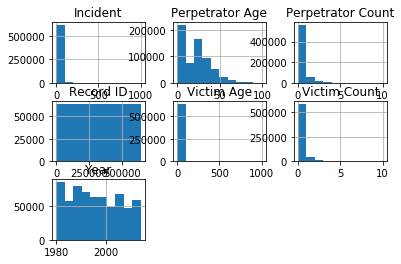

In [9]:
df.hist()

In [ ]:
df.plot(kind = "density",subplots = True,layout = (3,3))

In [15]:
import seaborn as sns

In [17]:
#sns.pairplot(df)